In [1]:
import os
from os.path import join as pj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Statistics
from evaluation.classification.statistics import compute_all_size_df, get_precisions
plt.style.use("ggplot")
%matplotlib inline

### --- compare confusion matrix ---

In [2]:
resnet50 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/validation_matrix.csv')
resnet50_resize_fix_aspect_ratio = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_resize/validation_matrix.csv')
resnet50_resize = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_resize_crossvalid/validation_matrix.csv')

In [3]:
resnet50_precisions = get_precisions(resnet50)
resnet50_resize_fix_aspect_ratio_precisions = get_precisions(resnet50_resize_fix_aspect_ratio)
resnet50_resize_precisions = get_precisions(resnet50_resize)

In [4]:
exp_name = ["resnet50", "resnet50_resize_fix_aspect_ratio", "resnet50_resize"]
exp_ap = [resnet50_precisions.mean(), resnet50_resize_fix_aspect_ratio_precisions.mean(), resnet50_resize_precisions.mean()]

In [5]:
df = pd.DataFrame({"exp_name": exp_name, "exp_ap": exp_ap})
df

,exp_name,exp_ap
0,resnet50,0.877763
1,resnet50_resize_fix_aspect_ratio,0.884649
2,resnet50_resize,0.889117


In [6]:
df_per_label = pd.DataFrame({"resnet50": resnet50_precisions, "resnet50_resize_fix_aspect_ratio": resnet50_resize_fix_aspect_ratio_precisions, "resnet50_resize": resnet50_resize_precisions})
df_per_label['Name'] = ['Diptera', 'Ephemeridae', 'Ephemeroptera', 'Lepidoptera', 'Plecoptera', 'Trichoptera']

In [7]:
df_per_label

,resnet50,resnet50_resize_fix_aspect_ratio,resnet50_resize,Name
0,0.933174,0.954654,0.928922,Diptera
1,0.960784,0.921569,0.960784,Ephemeridae
2,0.770000,0.765000,0.752809,Ephemeroptera
3,0.885185,0.874074,0.880150,Lepidoptera
4,0.813433,0.880597,0.884615,Plecoptera
5,0.904000,0.912000,0.927419,Trichoptera


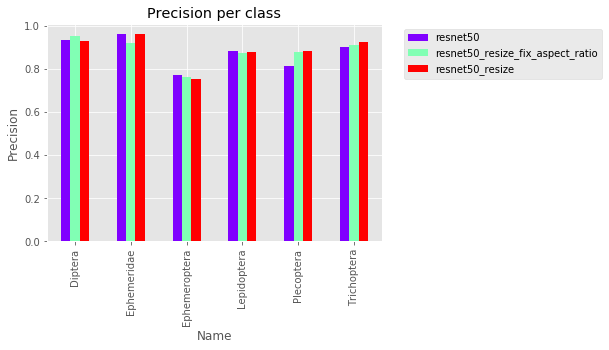

In [8]:
df_per_label.plot(kind="bar", x="Name", y=["resnet50", "resnet50_resize_fix_aspect_ratio", "resnet50_resize"], cmap="rainbow")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Precision")
plt.title("Precision per class")
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_insect_resize/compare_precision_resnet50.png", bbox_inches="tight")

### --- compare accuracy distribution of size ---

In [9]:
resnet50 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/each_size_df.csv')
resnet50_resize_fix_aspect_ratio = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_resize/each_size_df.csv')
resnet50_resize  = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_resize_crossvalid/each_size_df.csv')
new_resnet50_resize_fix_aspect_ratio = pd.DataFrame({"Accuracy": resnet50_resize_fix_aspect_ratio["Accuracy"].values, "Insect_size": resnet50["Insect_size"].values})
new_resnet50_resize = pd.DataFrame({"Accuracy": resnet50_resize["Accuracy"].values, "Insect_size": resnet50["Insect_size"].values})
resnet50_resize_fix_aspect_ratio = compute_all_size_df(new_resnet50_resize_fix_aspect_ratio)
resnet50_resize = compute_all_size_df(new_resnet50_resize)
resnet50 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/all_size_df.csv')

ValueError: arrays must all be same length

In [11]:
resnet50_resize_fix_aspect_ratio

,Unnamed: 0,Accuracy,Insect_size
0,0,True,28855
1,1,True,33233
2,2,True,36417
3,3,True,35422
4,4,True,35621
...,...,...,...
1319,1319,True,17313
1320,1320,True,26865
1321,1321,False,21691
1322,1322,True,19900


In [10]:
resnet50_resize

,Unnamed: 0,Accuracy,Insect_size
0,0,True,39601
1,1,True,39601
2,2,True,39601
3,3,True,39601
4,4,True,39601
...,...,...,...
1277,1277,True,39601
1278,1278,False,39601
1279,1279,True,39601
1280,1280,False,39601


In [10]:
resnet50_not_resize = resnet50_not_resize.drop(resnet50_not_resize.index[[0]])
resnet50_resize = resnet50_resize.drop(resnet50_resize.index[[0]])

In [11]:
all_df = resnet50_not_resize
all_df = all_df.rename(columns={'Accuracy': 'resnet50_not_resize'})
all_df = all_df.assign(resnet50_resize=resnet50_resize["Accuracy"])
all_df

,order,resnet50_not_resize,Insect_size,order.1,resnet50_resize
1,7.0,1.000000,205.833333,7.0,1.000000
2,8.0,0.901961,395.039216,8.0,0.901961
3,9.0,0.716535,770.850394,9.0,0.771654
4,10.0,0.805085,1504.529661,10.0,0.847458
5,11.0,0.875862,2941.368966,11.0,0.879310
6,12.0,0.938710,5934.145161,12.0,0.932258
7,13.0,0.956938,11264.789474,13.0,0.956938
8,14.0,0.961538,22344.653846,14.0,0.935897
9,15.0,0.900000,34865.400000,15.0,0.900000


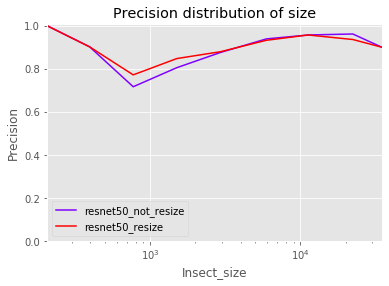

In [12]:
all_df.plot(x="Insect_size", y=["resnet50_not_resize", "resnet50_resize"], logx=True, legend=True, cmap="rainbow")
plt.ylabel("Precision")
plt.title("Precision distribution of size")
plt.ylim(0.0, 1.01)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_insect_resize/compare_precision_distrib_of_size.png", bbox_inches="tight")